# Imports

In [1]:
import pandas as pd
import warnings
import numpy as np

from datetime import datetime

from virality.utils.data_processing import engagement_extractor
from virality.utils.interpolation import LinearInterpolator, CurveFitter

warnings.filterwarnings("ignore", category=RuntimeWarning)

pd.set_option('display.float_format', lambda x: '%.8f' % x)
pd.set_option('display.precision', 3)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

# Load Data

In [2]:
df = pd.read_parquet("../data/data_cleaned.parquet").sample(10000, random_state=22).reset_index(drop=True)

# Linear Interpolation

In [5]:
# Use "steps" because "absolute" much slower to interpolate
train, test = engagement_extractor(df, time_type = "steps")

10000it [00:01, 6339.37it/s]


In [6]:
train.head()

,id,creation_time,history_len,times,engagements
0,19621|650845253751897,2023-06-20 20:04:14,33,"[0.0, 1.0, 6.0, 8.0, 10.0, 13.0, 22.0, 25.0, 27.0, 28.0, 29.0, 31.0, 32.0, 33.0, 34.0, 36.0, 37.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0]","[0.0, 7.0, 11.0, 18.0, 23.0, 25.0, 32.0, 32.0, 33.0, 33.0, 34.0, 37.0, 39.0, 42.0, 43.0, 43.0, 43.0, 44.0, 44.0, 45.0, 45.0, 45.0, 51.0, 53.0, 53.0, 53.0, 53.0, 53.0, 53.0]"
1,4258311|697262265777468,2023-07-10 15:49:03,35,"[0.0, 8.0, 10.0, 13.0, 15.0, 17.0, 20.0, 22.0, 27.0, 28.0, 30.0, 31.0, 32.0, 33.0, 34.0, 38.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 49.0, 53.0, 56.0, 59.0]","[1.0, 48.0, 58.0, 73.0, 80.0, 82.0, 87.0, 88.0, 99.0, 106.0, 115.0, 119.0, 127.0, 134.0, 138.0, 158.0, 195.0, 201.0, 204.0, 208.0, 210.0, 217.0, 220.0, 229.0, 242.0, 249.0, 250.0]"
2,1428374|722064109929017,2023-06-16 11:27:44,42,"[0.0, 3.0, 6.0, 9.0, 13.0, 15.0, 17.0, 18.0, 22.0, 24.0, 25.0, 27.0, 28.0, 29.0, 30.0, 31.0, 33.0, 34.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 46.0, 47.0, 48.0, 49.0, 50.0, 55.0, 56.0, 58.0, 60.0]","[0.0, 15.0, 23.0, 29.0, 40.0, 46.0, 49.0, 52.0, 59.0, 60.0, 60.0, 60.0, 60.0, 60.0, 61.0, 62.0, 67.0, 74.0, 76.0, 77.0, 78.0, 83.0, 87.0, 92.0, 93.0, 93.0, 95.0, 95.0, 96.0, 96.0, 96.0, 97.0, 101.0, 101.0, 102.0, 102.0]"
3,3461|662467152416636,2023-06-28 21:44:01,36,"[0.0, 4.0, 7.0, 13.0, 15.0, 17.0, 20.0, 22.0, 24.0, 27.0, 28.0, 29.0, 30.0, 32.0, 33.0, 34.0, 35.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 50.0, 53.0, 55.0]","[0.0, 0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0]"
4,5372679|684327407071847,2023-07-01 14:30:00,43,"[0.0, 4.0, 7.0, 10.0, 12.0, 14.0, 15.0, 17.0, 19.0, 24.0, 27.0, 29.0, 30.0, 32.0, 33.0, 36.0, 38.0, 39.0, 40.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 58.0, 59.0]","[0.0, 10.0, 13.0, 19.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 24.0, 28.0, 29.0, 29.0, 30.0, 30.0, 31.0, 31.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0]"


In [7]:
test.head()

,id,creation_time,history_len,times,engagements
0,19621|650845253751897,2023-06-20 20:04:14,33,"[15.0, 18.0, 20.0, 38.0, 45.0]","[29.0, 31.0, 32.0, 43.0, 52.0]"
1,4258311|697262265777468,2023-07-10 15:49:03,35,"[6.0, 24.0, 29.0, 36.0, 37.0, 39.0, 40.0, 57.0]","[29.0, 92.0, 111.0, 145.0, 150.0, 186.0, 194.0, 250.0]"
2,1428374|722064109929017,2023-06-16 11:27:44,42,"[11.0, 19.0, 21.0, 32.0, 35.0, 45.0, 51.0]","[35.0, 52.0, 56.0, 64.0, 75.0, 95.0, 98.0]"
3,3461|662467152416636,2023-06-28 21:44:01,36,"[10.0, 49.0, 57.0, 59.0]","[1.0, 4.0, 4.0, 4.0]"
4,5372679|684327407071847,2023-07-01 14:30:00,43,"[22.0, 28.0, 31.0, 34.0, 37.0, 41.0, 57.0, 60.0]","[22.0, 25.0, 29.0, 30.0, 31.0, 32.0, 32.0, 32.0]"


In [8]:
li = LinearInterpolator()

In [9]:
# Train: timesteps
train["complete_time"], train["interpolated_engagements"] = li.interpolate(train)
score = li.evaluate(train, test)
print(f"Average Mean Absolute Error: {score}")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 4823.65it/s]

Average Mean Absolute Error: 0.28036737598797934


-----Row 5993-----


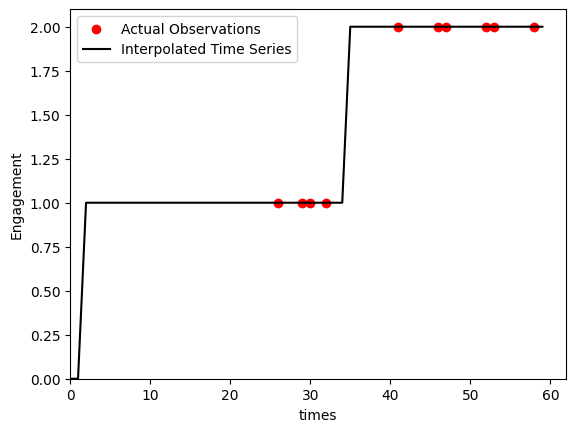


-----Row 2406-----


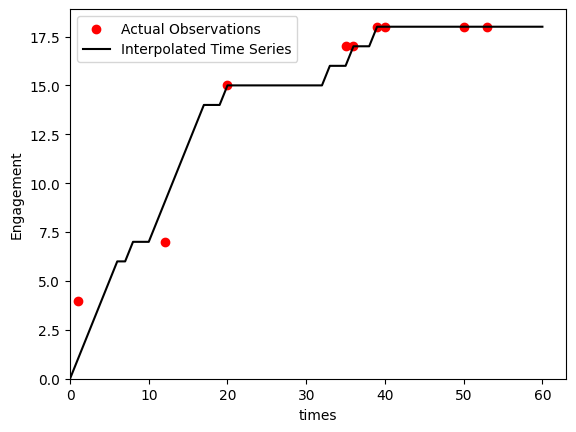


-----Row 2018-----


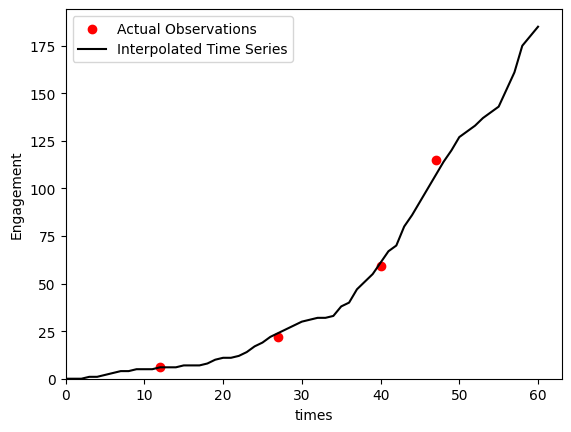


-----Row 9265-----


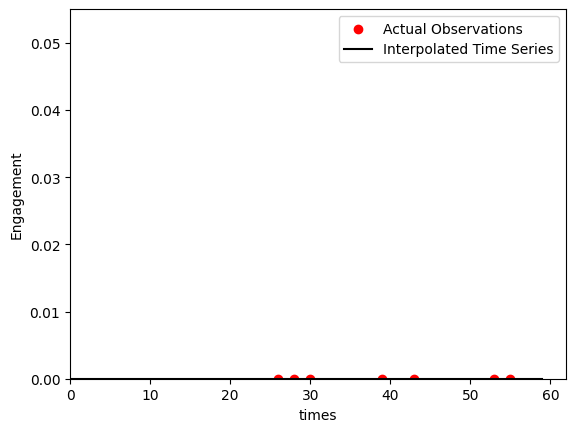


-----Row 5938-----


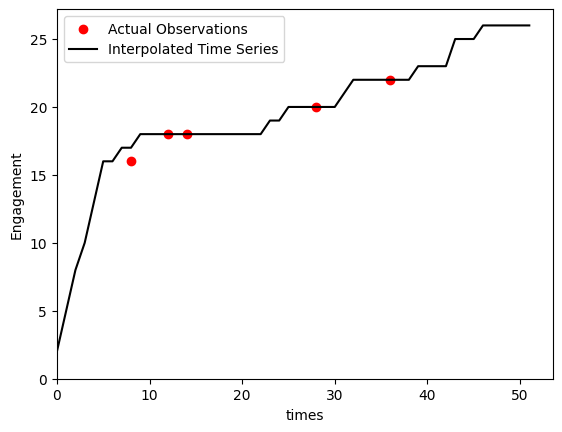


-----Row 4175-----


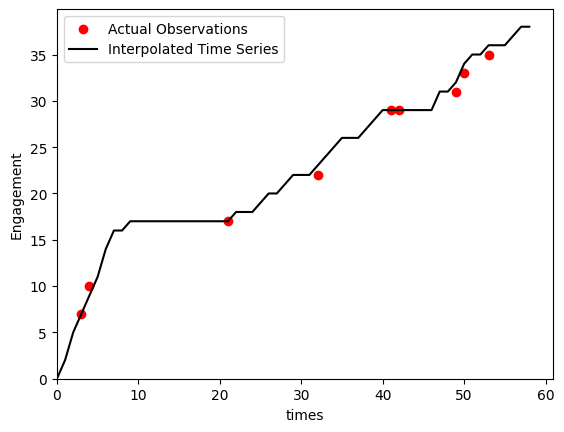


-----Row 3084-----


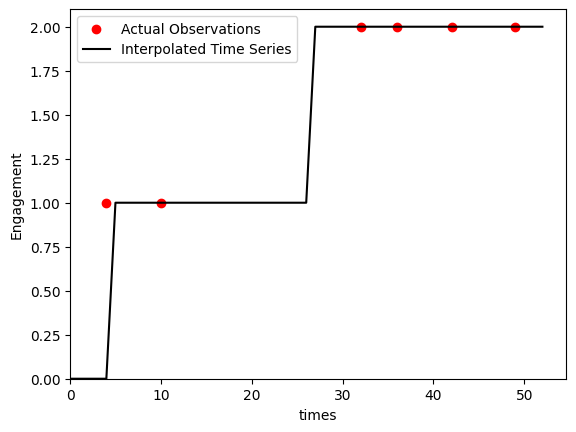


-----Row 3880-----


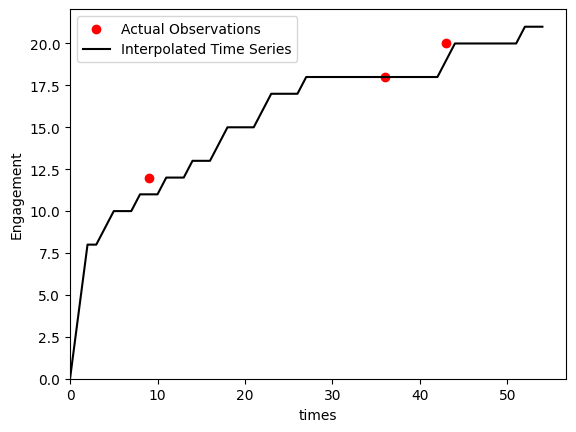


-----Row 5659-----


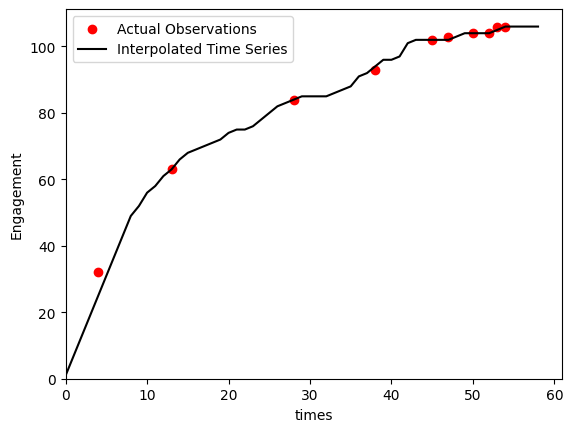


-----Row 5863-----


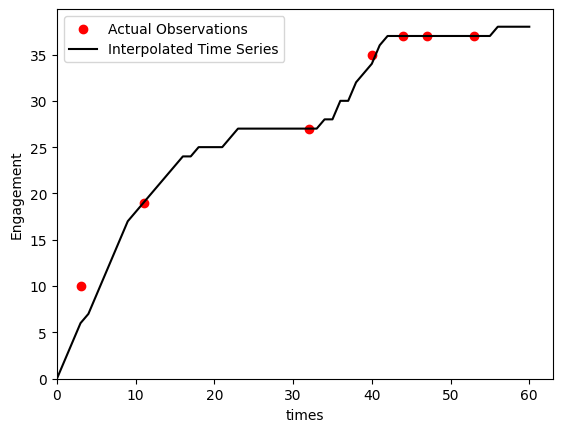

In [10]:
for i in range(10):
    i = np.random.randint(len(test), size=1)[0]
    print(f"-----Row {i}-----")
    li.plot_predictions(train.iloc[i], test.iloc[i])
    print()

# Curve Fit

In [3]:
# Use "absolute" because "steps" much slower to interpolate
train, test = engagement_extractor(df, time_type = "absolute")

10000it [00:05, 1896.91it/s]


In [13]:
train.head()

,id,creation_time,history_len,times,engagements
0,19621|650845253751897,2023-06-20 20:04:14,33,"[0.0, 18.0, 234.0, 313.0, 529.0, 599.0, 672.0, 746.0, 793.0, 891.0, 967.0, 1036.0, 1113.0, 1188.0, 1263.0, 1338.0, 1412.0, 1485.0, 2160.0, 2502.0, 2860.0, 2930.0, 3282.0, 4028.0]","[0.0, 7.0, 23.0, 25.0, 32.0, 32.0, 32.0, 33.0, 33.0, 34.0, 37.0, 39.0, 42.0, 43.0, 43.0, 43.0, 43.0, 44.0, 45.0, 51.0, 53.0, 53.0, 53.0, 53.0]"
1,4258311|697262265777468,2023-07-10 15:49:03,35,"[0.0, 6.0, 94.0, 171.0, 240.0, 304.0, 372.0, 443.0, 512.0, 584.0, 730.0, 801.0, 866.0, 932.0, 996.0, 1065.0, 1137.0, 1195.0, 1271.0, 1348.0, 1429.0, 1583.0, 1785.0, 1919.0, 2279.0, 2471.0, 2632.0, 2867.0, 2941.0, 3787.0, 5333.0, 6675.0, 7889.0, 9324.0]","[0.0, 1.0, 29.0, 48.0, 58.0, 73.0, 80.0, 82.0, 87.0, 88.0, 99.0, 106.0, 111.0, 115.0, 119.0, 127.0, 134.0, 138.0, 145.0, 150.0, 158.0, 186.0, 194.0, 195.0, 204.0, 208.0, 210.0, 217.0, 220.0, 229.0, 242.0, 249.0, 250.0, 250.0]"
2,1428374|722064109929017,2023-06-16 11:27:44,42,"[0.0, 119.0, 185.0, 256.0, 321.0, 384.0, 475.0, 498.0, 547.0, 596.0, 644.0, 690.0, 745.0, 922.0, 978.0, 1037.0, 1091.0, 1256.0, 1307.0, 1362.0, 1416.0, 1597.0, 1791.0, 1971.0, 2298.0, 2676.0, 2836.0, 3570.0, 4548.0, 5810.0, 6956.0, 8341.0, 9735.0]","[0.0, 23.0, 29.0, 35.0, 40.0, 46.0, 52.0, 52.0, 56.0, 59.0, 60.0, 60.0, 60.0, 61.0, 62.0, 64.0, 67.0, 75.0, 76.0, 77.0, 78.0, 83.0, 87.0, 92.0, 93.0, 95.0, 95.0, 96.0, 98.0, 101.0, 101.0, 102.0, 102.0]"
3,3461|662467152416636,2023-06-28 21:44:01,36,"[0.0, 3.0, 73.0, 143.0, 219.0, 302.0, 377.0, 519.0, 583.0, 649.0, 720.0, 788.0, 945.0, 1024.0, 1179.0, 1254.0, 1465.0, 1673.0, 1818.0, 2021.0, 2379.0, 2535.0, 2755.0, 3550.0, 3763.0, 5367.0, 6448.0, 7783.0, 8876.0]","[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]"
4,5372679|684327407071847,2023-07-01 14:30:00,43,"[0.0, 70.0, 150.0, 222.0, 294.0, 358.0, 362.0, 433.0, 502.0, 571.0, 643.0, 790.0, 860.0, 929.0, 994.0, 1063.0, 1130.0, 1268.0, 1348.0, 1499.0, 1861.0, 1997.0, 2229.0, 2372.0, 2572.0, 2713.0, 3248.0, 3603.0, 4012.0, 4380.0, 5113.0, 5816.0, 7074.0, 7221.0, 7950.0]","[0.0, 10.0, 13.0, 19.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 25.0, 28.0, 29.0, 29.0, 29.0, 30.0, 30.0, 31.0, 31.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0]"


In [14]:
test.head()

,id,creation_time,history_len,times,engagements
0,19621|650845253751897,2023-06-20 20:04:14,33,"[90.0, 162.0, 385.0, 457.0, 1691.0, 1908.0, 1980.0, 2577.0, 3612.0, 4598.0]","[11.0, 18.0, 29.0, 31.0, 44.0, 45.0, 45.0, 52.0, 53.0, 53.0]"
1,4258311|697262265777468,2023-07-10 15:49:03,35,"[659.0, 2143.0]","[92.0, 201.0]"
2,1428374|722064109929017,2023-06-16 11:27:44,42,"[49.0, 439.0, 803.0, 862.0, 1148.0, 2138.0, 2518.0, 3221.0, 3926.0, 4301.0]","[15.0, 49.0, 60.0, 60.0, 74.0, 93.0, 95.0, 96.0, 96.0, 97.0]"
3,3461|662467152416636,2023-06-28 21:44:01,36,"[449.0, 865.0, 1106.0, 1321.0, 1394.0, 2161.0, 2907.0, 4000.0]","[2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0]"
4,5372679|684327407071847,2023-07-01 14:30:00,43,"[722.0, 1196.0, 1423.0, 1725.0, 2950.0, 4737.0, 5457.0, 8643.0, 9397.0]","[24.0, 30.0, 31.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0]"


In [4]:
cf = CurveFitter()

In [5]:
# Train
train["fit_type"], train["parameters"] = cf.train(train)

  7%|████████▌                                                                                                                | 706/10000 [00:07<01:26, 107.37it/s]

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number 

 16%|██████████████████▉                                                                                                     | 1581/10000 [00:17<01:21, 102.67it/s]

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number 

 25%|██████████████████████████████                                                                                          | 2503/10000 [00:27<01:12, 103.40it/s]

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number 

 34%|████████████████████████████████████████▌                                                                               | 3376/10000 [00:35<00:58, 113.11it/s]

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number 

 44%|████████████████████████████████████████████████████▋                                                                   | 4394/10000 [00:47<00:48, 115.19it/s]

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number 

 55%|█████████████████████████████████████████████████████████████████▍                                                      | 5452/10000 [00:58<00:42, 106.82it/s]

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number 

 66%|███████████████████████████████████████████████████████████████████████████████▌                                        | 6626/10000 [01:11<00:33, 101.88it/s]

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number 

 75%|███████████████████████████████████████████████████████████████████████████████████████████                              | 7527/10000 [01:20<00:25, 95.29it/s]

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number 

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████                  | 8504/10000 [01:30<00:12, 120.64it/s]

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number 

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 9448/10000 [01:40<00:08, 64.73it/s]

 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number 

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:46<00:00, 94.17it/s]


In [17]:
train["fit_type"].value_counts(normalize=True)

fit_type
logarithmic   0.75210000
sigmoid       0.17000000
linear        0.04010000
exponential   0.03780000
Name: proportion, dtype: float64

In [18]:
# Test
score = cf.evaluate(train, test)
print(f"Average Mean Absolute Error: {score}")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 4027.58it/s]

Average Mean Absolute Error: 1.7391375315887951


-----Row 6134-----


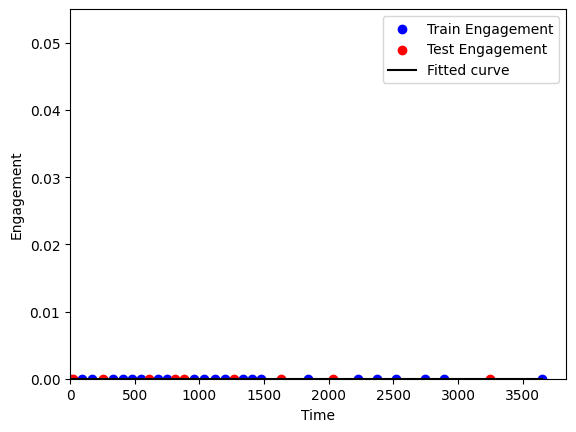


-----Row 4330-----


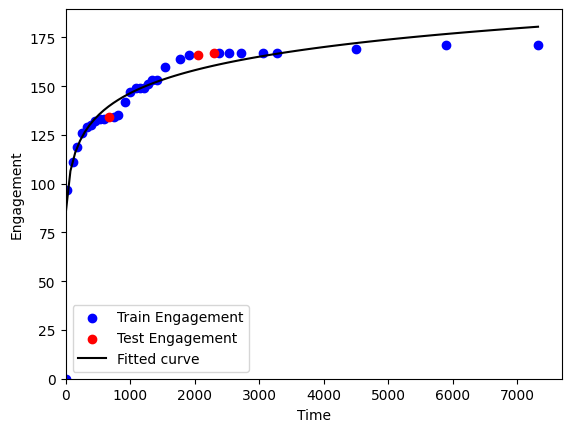


-----Row 5998-----


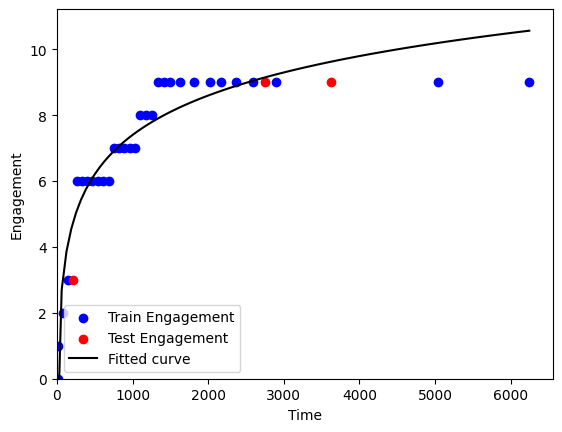


-----Row 7112-----


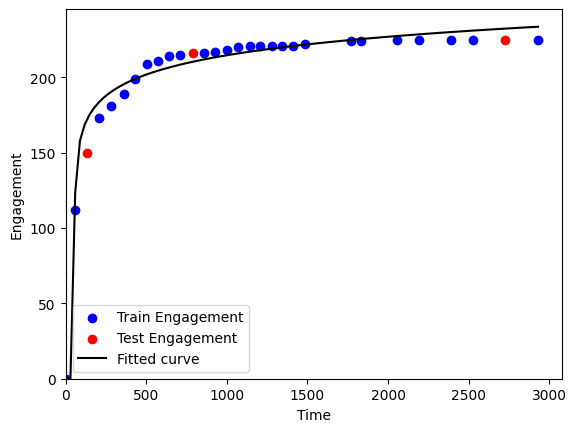


-----Row 7193-----


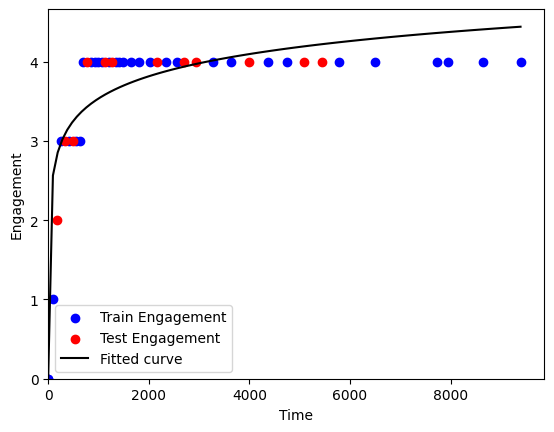


-----Row 2504-----


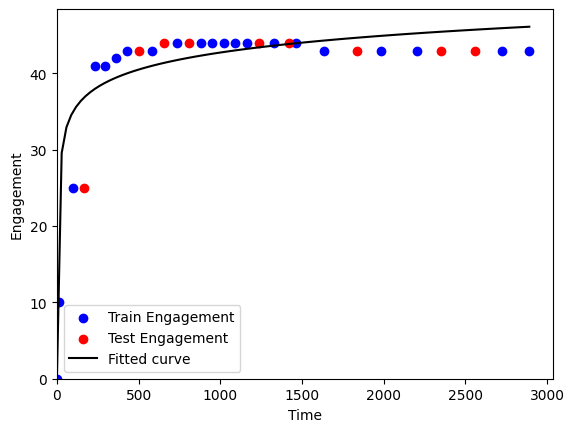


-----Row 3376-----


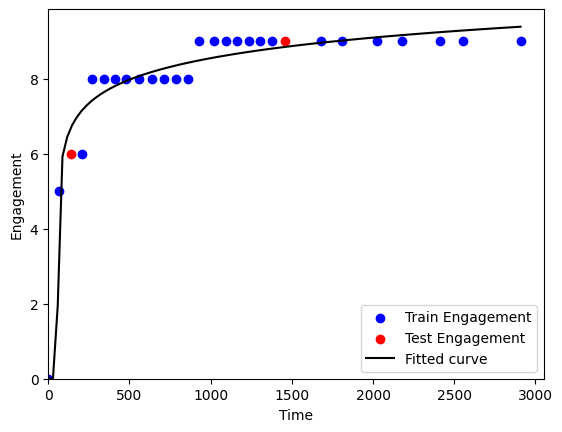


-----Row 5649-----


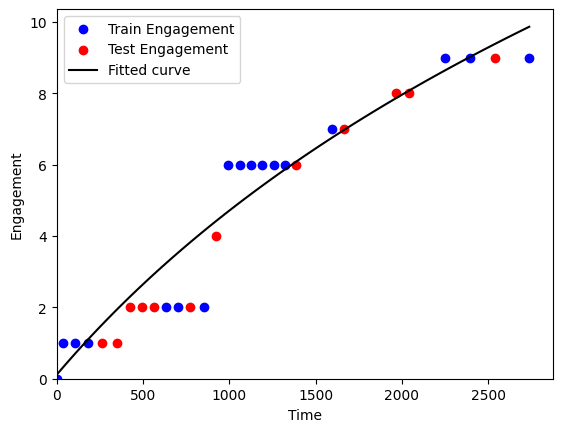


-----Row 4747-----


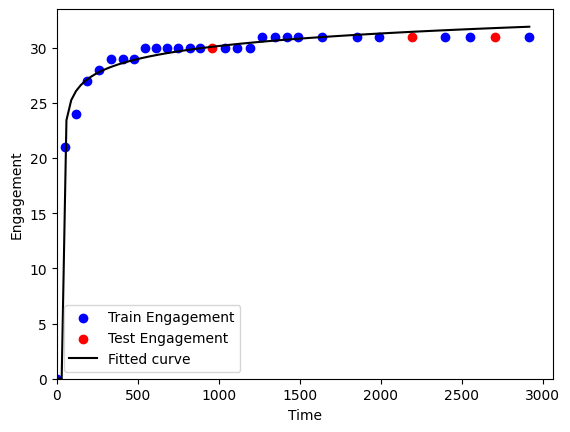


-----Row 250-----


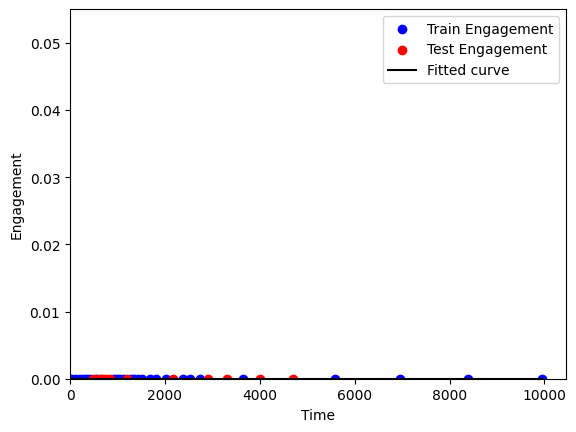

In [7]:
for i in range(10):

    i = np.random.randint(len(test), size=1)[0]
    print(f"-----Row {i}-----")
    cf.plot_predictions(train.iloc[i], test.iloc[i])
    print()

Curve fitting has an average error 6x that of linear interpolation. This isn't all that unsurpising as linear interpolation preserves more of the step-function nature of the engagement count data whereas curve fitting assumes a continuous output variable